In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
base_dir = "E:\\BUTCAMP\\PORTO\\"
path = base_dir + 'bread basket.CSV'
# Load Dataset
df = pd.read_csv(path)

print(df.shape)
df.head(7).tail(7)


(20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend


## EDA

In [3]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
# format data dalam Waktu
df["date_time"] = pd.to_datetime(df['date_time'], format= '%d-%m-%Y %H:%M')

In [6]:
df['month'] = df ['date_time'].dt.month
df['day']= df ['date_time'].dt.weekday
df['hour']= df['date_time'].dt.hour
df

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10
...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,4,6,14
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,4,6,14
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,4,6,14
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,4,6,14


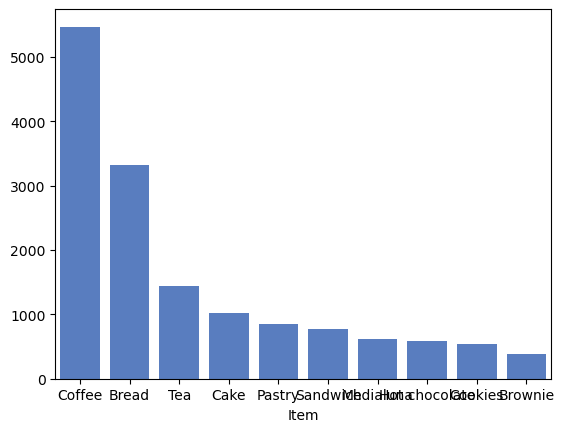

In [7]:
sns.set_palette('muted')
sns.barplot(x=df['Item'].value_counts()[:10].index,
            y= df['Item'].value_counts()[:10].values)
plt.show()

month
10     369
11    4436
12    3339
1     3356
2     3906
3     3944
4     1157
Name: Transaction, dtype: int64

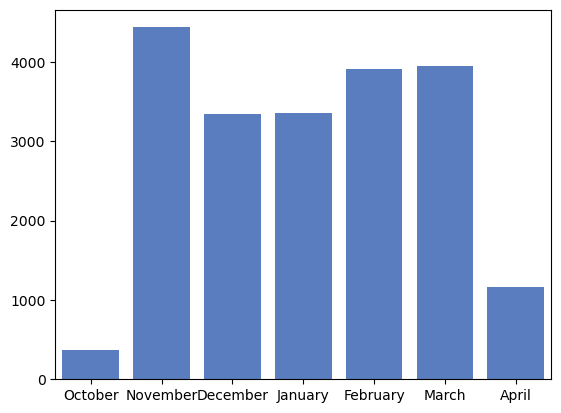

In [8]:
df_month =  df.groupby('month')['Transaction'].count()
df_month= pd.concat ([df_month.iloc[4:], df_month.iloc[:4]])
display(df_month)
sns.barplot(
    x= ['October', 'November', 'December', 'January', "February", "March", 'April'],
    y= df_month.values
)
plt.show()

day
0    2324
1    2392
2    2321
3    2646
4    3124
5    4605
6    3095
Name: Transaction, dtype: int64

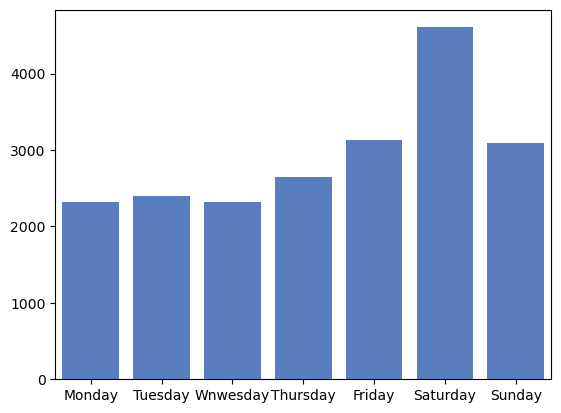

In [9]:
df_day = df.groupby('day')['Transaction'].count()

display(df_day)
sns.barplot(
    x= ['Monday', 'Tuesday', 'Wnwesday', 'Thursday', "Friday", "Saturday", 'Sunday'],
    y= df_day.values
)
plt.show()

hour
1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: Transaction, dtype: int64

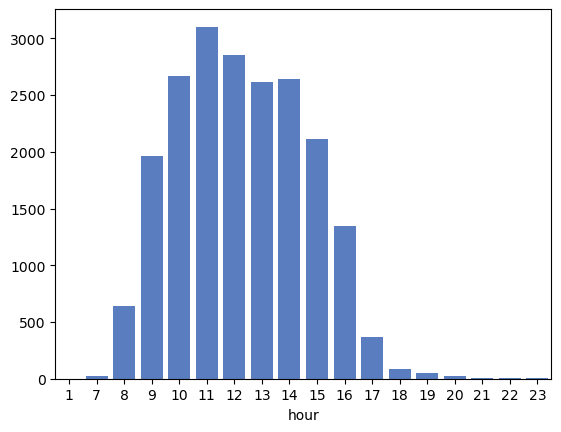

In [10]:
df_hour = df.groupby('hour')['Transaction'].count()

display(df_hour)
sns.barplot(
    x= df_hour.index,
    y= df_hour.values
)
plt.show()

## Data Preparation

In [11]:
df['Item']= df['Item']. apply (lambda item: item.strip())
df['Item']= df['Item']. apply (lambda item: item.lower())
df

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,jam,2016-10-30 10:07:00,morning,weekend,10,6,10
...,...,...,...,...,...,...,...,...
20502,9682,coffee,2017-04-09 14:32:00,afternoon,weekend,4,6,14
20503,9682,tea,2017-04-09 14:32:00,afternoon,weekend,4,6,14
20504,9683,coffee,2017-04-09 14:57:00,afternoon,weekend,4,6,14
20505,9683,pastry,2017-04-09 14:57:00,afternoon,weekend,4,6,14


In [12]:
df_item= df[["Transaction", 'Item']].copy()
df_item

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
...,...,...
20502,9682,coffee
20503,9682,tea
20504,9683,coffee
20505,9683,pastry


In [13]:
from mlxtend.frequent_patterns import association_rules, apriori

In [14]:
item_count= df.groupby(['Transaction','Item'])['Item']. count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [17]:
item_count_pivot = item_count.pivot_table(index= "Transaction", columns='Item', values='Count', aggfunc='sum').fillna(0)
print('Ukuran data set :', item_count_pivot.shape)
item_count_pivot.head(10)

Ukuran data set : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
item_count_pivot= item_count_pivot.astype('int')
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def encode(x):
    if x<=0:
        return 0
    elif x>=1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2856\3671389060.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print('Ukuran datase: ', item_count_pivot.shape)
print("Jumlah Transaksi:", item_count_pivot.shape[0])
print("jumlah Item:", item_count_pivot.shape[1])

Ukuran datase:  (9465, 94)
Jumlah Transaksi: 9465
jumlah Item: 94


In [22]:
support= 0.01
frequent_items= apriori(item_count_pivot, min_support= support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)


c:\Users\LENOVO\miniconda3\envs\base_copy\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(coffee, cake)"


In [23]:
metric = "lift"
min_threshold =1
rules= association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[['antecedents', "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(10)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
23,(pastry),(coffee),0.047544,0.552147,1.154168
1,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
7,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
13,(cookies),(coffee),0.028209,0.518447,1.083723
